# IMDB

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.text import *

## Preparing the data

First let's download the dataset we are going to study. The [dataset](http://ai.stanford.edu/~amaas/data/sentiment/) has been curated by Andrew Maas et al. and contains a total of 100,000 reviews on IMDB. 25,000 of them are labelled between positive and negative for training, another 25,000 are labelled for testing (in both cases they are highly polarized). The remaning 50,000 is an additional unlabelled data (but we will find a use for it nonetheless).

We'll begin with a sample we've prepared for you, so that things run quickly before going over the full dataset.

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb_sample/texts.csv')]

It only contains one csv file, let's have a look at it.

In [ ]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [ ]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

It contains one line per review, with the label ('negative' or 'positive'), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code:

In [ ]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

By executing this line a process was launched that took a bit of time. Let's dig a bit into it. Images could be fed (almost) directly into a model because they're just a big array of pixel values that are floats between 0 and 1. A text is composed of words, and we can't apply mathematical functions to them directly. We first have to convert them to numbers. This is done in two differents steps: tokenization and numericalization. A `TextDataBunch` does all of that behind the scenes for you.

Before we delve into the explanations, let's take the time to save the things that were calculated.

In [ ]:
data_lm.save()

Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

In [ ]:
data = TextDataBunch.load(path)

### Tokenization

The first step of processing we make texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation
- some words are contractions of two different words, like isn't or don't
- we may need to clean some parts of our texts, if there's HTML code for instance

To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [ ]:
data = TextClasDataBunch.load(path)
data.show_batch()

text,label
"xxfld 1 raising victor vargas : a review \n\n you know , raising victor vargas is like sticking your hands into a big , xxunk bowl of xxunk . it 's warm and gooey , but you 're not sure if it feels right . try as i might , no matter how warm and gooey raising victor vargas became i was always aware that something did n't quite feel right . victor vargas suffers from a certain xxunk on the director 's part . apparently , the director thought that the ethnic backdrop of a latino family on the",negative
"xxfld 1 now that che(2008 ) has finished its relatively short australian cinema run ( extremely limited xxunk screen in xxunk , after xxunk ) , i can xxunk join both xxunk of "" at the movies "" in taking steven soderbergh to task . \n\n it 's usually satisfying to watch a film director change his style / subject , but soderbergh 's most recent stinker , the girlfriend xxunk ) , was also missing a story , so narrative ( and editing ? ) seem to suddenly be soderbergh 's main challenge . strange , after xxunk years",negative
"xxfld 1 many xxunk that this is n't just a classic due to the fact that it 's the first 3d game , or even the first xxunk - up . it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . with graphics that are terribly dated today , the game xxunk you into the role of xxunk even * think * i 'm going to attempt spelling his last name ! ) , an american",positive
"xxfld 1 i really wanted to love this show . i truly , honestly did . \n\n for the first time , gay viewers get their own version of the "" the bachelor "" . with the help of his obligatory "" hag "" xxunk , james , a good looking , well - to - do thirty - something has the chance of love with 15 suitors ( or "" mates "" as they are referred to in the show ) . the only problem is half of them are straight and james does n't know this . if",negative
"xxfld 1 this film sat on my xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the xxunk - up xxunk of new xxunk . \n\n the format is the same as max xxunk ' "" la xxunk , "" based on a play by arthur xxunk , who is given an "" inspired by "" credit . it starts from one person , a prostitute , standing on a street xxunk in brooklyn . she is picked",positive
"xxfld 1 how viewers react to this new "" adaption "" of shirley jackson 's book , which was promoted as xxup not being a remake of the original 1963 movie ( true enough ) , will be based , i suspect , on the following : those who were big fans of either the book or original movie are not going to think much of this one ... and those who have never been exposed to either , and who are big fans of hollywood 's current trend towards "" special effects "" being the first and last word",negative
"xxfld 1 to review this movie , i without any doubt would have to quote that memorable scene in tarantino 's "" pulp fiction "" ( xxunk ) when jules and vincent are talking about mia wallace and what she does for a living . jules tells vincent that the "" only thing she did worthwhile was pilot "" . vincent asks "" what the hell is a pilot ? "" and jules goes into a very well description of what a tv pilot is : "" well , the way they make shows is , they make one show",negative
"xxfld 1 \n\n i 'm sure things did n't exactly go the same way in the real life of homer hickam as they did in the film adaptation of his book , rocket boys , but the movie "" october sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read hickam 's memoirs , but i am still able to enjoy and understand their film adaptation . the film , directed by joe xxunk and written by lewis xxunk , xxunk the story of teenager homer hickam (",positive
"xxfld 1 well , what can i say . \n\n "" what the xxunk do we know "" has achieved the nearly impossibl

The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols: 
- the "'s" are grouped together in one token
- the contractions are separated like his: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several special tokens (all those that begin by xx), to replace unkown tokens (see below) or to introduce different text fields (here we only have one).

### Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at list twice with a maximum vocabular size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.

The correspondance from ids tokens is stored in the `vocab` attribute of our datasets, in a dictionary called `itos` (for int to string).

In [ ]:
data.train_ds.vocab.itos

['xxunk',
 'xxpad',
 'the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'that',
 'this',
 '"',
 "'s",
 '-',
 'was',
 '\n\n',
 'xxfld',
 'movie',
 'for',
 'as',
 'with',
 'but',
 'film',
 'you',
 ')',
 'on',
 "n't",
 '(',
 'xxup',
 'are',
 'not',
 'he',
 'his',
 'have',
 'be',
 'one',
 '2',
 'they',
 '1',
 'all',
 'at',
 'by',
 'like',
 'an',
 'from',
 'who',
 'so',
 '!',
 'or',
 'there',
 'just',
 'about',
 'if',
 'false',
 'out',
 'do',
 'her',
 'some',
 'what',
 'has',
 "'",
 '?',
 'more',
 'good',
 'up',
 'she',
 'when',
 'would',
 'very',
 'were',
 'their',
 'no',
 'even',
 'only',
 'time',
 'my',
 'can',
 'had',
 'story',
 'really',
 'which',
 'see',
 ':',
 'did',
 'me',
 'well',
 'does',
 'into',
 'we',
 'bad',
 'will',
 'also',
 'get',
 'because',
 '...',
 'than',
 'much',
 'first',
 'any',
 'been',
 'other',
 'true',
 'could',
 'people',
 'its',
 'how',
 'made',
 'make',
 'then',
 'great',
 'two',
 'most',
 'him',
 'way',
 'them',
 'too',
 '/',
 'never',

And if we look at what a what's in our datasets, we'll see only numbers:

In [ ]:
data.train_ds[0]

([20,
  42,
  35,
  173,
  63,
  6,
  351,
  3,
  47,
  1493,
  3,
  61,
  1583,
  5,
  6,
  6,
  341,
  1324,
  4,
  43,
  35,
  475,
  18,
  8,
  2804,
  3,
  25,
  145,
  3,
  41,
  0,
  116,
  5,
  1584,
  2,
  207,
  35,
  725,
  1325,
  4,
  173,
  35,
  582,
  61,
  2228,
  3,
  5,
  8,
  96,
  1987,
  7,
  2,
  107,
  109,
  110,
  116,
  62,
  35,
  9,
  4,
  1494,
  3,
  1406,
  831,
  9,
  164,
  3,
  5,
  14,
  78,
  3,
  35,
  16,
  134,
  24,
  6,
  3256,
  4,
  19,
  689,
  3,
  14,
  21,
  90,
  30,
  37,
  2,
  115,
  0,
  262,
  11,
  2,
  207,
  3,
  25,
  108,
  4692,
  33,
  72,
  1201,
  5,
  856,
  61,
  583,
  1407,
  55,
  309,
  1035,
  4,
  7,
  264,
  3,
  46,
  224,
  0,
  21,
  304,
  2,
  149,
  7,
  2,
  1408,
  16,
  3,
  15,
  2,
  831,
  0,
  15,
  9,
  6,
  1495,
  17,
  2805,
  82,
  4,
  1406,
  831,
  9,
  6,
  1841,
  17,
  916,
  857,
  17,
  46,
  3,
  49,
  16,
  781,
  338,
  413,
  4,
  11,
  2,
  101,
  21,
  3,
  2,
  571,
  1689,
  36,
  

### With the data block API

We can use the data block API with NLP and have a lot more flexibility thant what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [ ]:
data = (SplitData.from_csv(path, 'texts.csv', input_cols=1, label_cols=0, valid_col=2)
        .datasets(TextDataset)
        .tokenize() #can specify custom arguments for tokenization here
        .numericalize() #can specify custom arguments for numericalization here
        .databunch(TextDataBunch))

NameError: name 'path' is not defined

### Full dataset

Now let's grab the full dataset for what follows.

In [ ]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb/train'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/test'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/README'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/models')]

The reviews are in a training and test set following an imagenet structure. The only difference is that there is an unsup folder in 'train' that contains the non-labelled data.

## Language model

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipeia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviex lefts by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust a little bit the parameters of our model. Plus there might be some words extremely common in that dataset that were barely present in wikipedia, and therefore might no be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a bit of time, roughly 5-6 minutes).

In [ ]:
data_lm = (TextFileList.from_folder(path)         
           #grap all the text files in path
           .label_from_func(lambda x:0)           
           #label them all wiht 0s (the targets aren't positive vs negative review here)
           .split_by_folder(valid='test')         
           #split by folder between train and validation set
           .datasets(TextDataset, is_fnames=True) 
           #use `TextDataset`, the flag `is_fnames=True` indicates to read the content of the files passed
           .tokenize()
           #tokenize with defaults from fastai
           .numericalize()
           #numericalize with defaults from fastai
           .databunch(TextLMDataBunch))
           #use a TextLMDataBunch
data_lm.save('tmp_lm')

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [ ]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm')
data_lm.show_batch()

idx,text
0,"xxfld 1 ricky ( eric freeman ) is the brother of the killer santa from the first film . do n't worry if you missed it -- the entire xxup first xxup half of the film are scenes from the earlier movie ! then it gets back to ricky being adopted and seemingly ok -- but the events he witnessed as a child are still with him and -- at the age of 18 - -he snaps and goes on a killing rampage . and , like his brother , he hunts down the mother"
1,"ever since the holiday special "" a charlie brown xxunk aired on xxup cbs - tv in november of xxunk was one of many "" peanuts "" inspired specials that brings out the kid in all of us , but at the same time have a message in between the lines . for years , from 1965 until xxunk xxup cbs television network has been xxunk these classic charlie brown specials every year including the titles based on the characters created by charles m. schultz . if you remember the specials that aired once annually"
2,"difficult to understand why things happen they way they do . also , the fragility of life itself is examined by mr . de oliveira in his own peculiar way . \n\n the director has given us no inkling up to the last moment of the film that anything could be so totally wrong . the whole film has such a soothing quality and a peaceful beauty that when the unexpected happens we are caught completely unaware of it . \n\n leonor silveira has worked with manoel de oliveira extensively . she has such a"
3,"very well - known for "" liking everything "" . hell , i loved the remake of war of the worlds , and am a complete fan of everything m. knight shyamalan , if that gives you any idea . \n\n but this film was so bad , all i can say is : keep any and all sharp objects safely out of reach while watching this movie ... because trust me , you will definitely want to slash your wrists before its painful 80 minutes are up . honestly , the entire film should"
4,"used to be great . one of the shows i liked was xxunk . it did manage to be interesting and imaginative in its approach to children programming . the show ( foster 's home for imaginary friends ) is like putting 20 spoons of sugar in your sprite . it seems as if today 's television producers are only interested in making money , rather than engaging the imaginations of children and making money ! lately , my children are tuning in to the old shows ( 60 's ) to find something interesting"
5,". all of them are trying to find the passages that will give them their xxup tomorrow , their sense of being in time and space . because the film is cursed and never finished the characters have a truncated identity . just like the guy that comes down from the screen in allen 's movie has no idea you need keys to drive a car , the characters in ie have no idea that they sometimes play in a movie that is not theirs and has other rules . this is why sometimes they"
6,"is a girl watchers paradise but , arabian type women with zippers on their costumes and high heels in the dessert ! it does n't get any better than this . when vincent price the comic relief , as omar khayyam , sells the availability of men to the raiders he literally is on top of what you may call a soap box . this movie could well push the cause of women 's lib back 50 years . no one but howard hughes could have produced a xxunk , yet tongue in cheek ,"
7,"going broke , and the ' flake - flipping snow gypsies ' xxrep 4 . huh ? \n\n produced by rankin / bass , though they 've done much better . xxfld 1 this is one of my favourite sci - fi movies with charlton heston making credible the whole story for me . anthony zerbe is tremendous as the family leader as is the now deceased lincoln kilpatrick as xxunk sidekick . heston as seemingly the last man on earth brings feeling to the film in some cleverly scripted conversations with himself ! in"
8,"make the next low budget masterpiece . \n\n most of the guys spotlighted in this doc come across as likable , everyday kids who just want to make something

We can then put this in a learner object very easily with a model loaded with the rpetrained weights. They'll be downloaded the first time you'll execute the following line and stored in './fastai/models/' (or elsewhere if you specified different paths in your config file).

In [ ]:
learn = language_model_learner(data_lm, drop_mult=0.3, pretrained_model=URLs.WT103)

In [ ]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


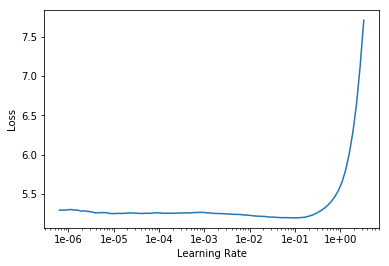

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7), wd=0.03)

Total time: 11:41
epoch  train_loss  valid_loss  accuracy
1      4.622700    4.462578    0.249668  (11:41)



In [ ]:
learn.save('fit_head')

In [ ]:
learn.load('fit_head')

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7), wd=0.03, pct_start=0.25)

Total time: 2:09:09
epoch  train_loss  valid_loss  accuracy
1      4.342993    4.278463    0.268850  (12:55)
2      4.250245    4.192998    0.279378  (12:57)
3      4.165312    4.144503    0.285050  (12:51)
4      4.121187    4.104517    0.289845  (12:54)
5      4.068878    4.078923    0.292670  (12:53)
6      4.028282    4.057202    0.295577  (12:57)
7      3.968565    4.043187    0.297289  (12:53)
8      3.893892    4.033587    0.298510  (12:54)
9      3.854538    4.030769    0.299093  (12:55)
10     3.808333    4.031565    0.299062  (12:56)



In [ ]:
learn.save('fine_tuned')

We have to save the model but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [ ]:
learn.save_encoder('fine_tuned_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [ ]:
data_clas = (TextFileList.from_folder(path)
             #grap all the text files in path
            .label_from_folder(classes=['neg','pos'])
             #label them all with their folder, only keep 'neg' and 'pos'
            .split_by_folder(valid='test')
             #split by folder between train and validation set
            .datasets(TextDataset, is_fnames=True)
             #use `TextDataset`, the flag `is_fnames=True` indicates to read the content of the files passed
            .tokenize()
             #tokenize with defaults from fastai
            .numericalize(vocab = data_lm.train_ds.vocab)
             #numericalize with the same vocabulary as our pretrained model
            .databunch(TextClasDataBunch, bs=50))
data_clas.save('tmp_clas')

In [ ]:
data_clas = TextClasDataBunch.load(path, 'tmp_clas', bs=50)
data_clas.show_batch()

text,label
"xxfld 1 match 1 : tag team table match bubba ray and spike dudley vs eddie guerrero and chris benoit bubba ray and spike dudley started things off with a tag team table match against eddie guerrero and chris benoit . according to the rules of the match , both opponents have to go through tables in order to get the win . benoit and guerrero heated up early on by taking turns hammering first spike and then bubba ray . a german suplex by benoit to bubba took the wind out of the dudley brother . spike tried to",pos
"xxfld 1 some have praised xxunk :- the lost xxunk as a disney adventure for adults . i do n't think so -- at least not for thinking adults . \n\n this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . the "" crack staff "" of many older adventure movies has been done well before , ( think the dirty dozen ) but xxunk represents one of the worse films in that motif . the characters are weak . even the",neg
"xxfld 1 heavy - handed moralism . writers using characters as mouthpieces to speak for themselves . predictable , plodding plot points ( say that five times fast ) . a child 's imitation of britney spears . this film has all the earmarks of a lifetime special reject . \n\n i honestly believe that jesus xxunk and julia xxunk set out to create a thought - provoking , emotional film on a tough subject , exploring the idea that things are not always black and white , that one who is a criminal by definition is not necessarily a",neg
"xxfld 1 the war between the states was perhaps the darkest hour in the history of america ; a war that pitted brother against brother and family against family and left scars that even today have not yet healed , and in all probability never will . and , as in any story about any war , beyond any historical significance it is the personal discord behind the greater conflict that creates the emotional impetus that makes it involving . it is the human element that renders the context necessary to give it perspective , which is what director ang",pos
"xxfld 1 enterprise , the latest high budget spin - off to the most successful franchise in film and or television history opens to the tune of a 90-minute episode called ' broken bow ' . first we are swept into a massive action sequence with a klingon being chased by some suliban ( who are the main enemy in the first season of the show ) . from there the televised movie takes us on a journey that seldom gets as good as it is , with some of the best character development , story and action / visual",pos
"xxfld 1 love hurts . that , i think , is the main message mike binder 's newest film reign over me brings across . whether that love has caused your relationship to become stagnant , or has brought anger from the one you love cheating for years , or has broken your heart to the point of being unable to open yourself up to the world , love hurts . the great thing about this film , however , is not in its portrayal of these lost souls trying to let their past heartbreaks go , but in the",pos
"xxfld 1 to review this movie , i without any doubt would have to quote that memorable scene in tarantino 's "" pulp fiction "" ( 1994 ) when jules and vincent are talking about mia wallace and what she does for a living . jules tells vincent that the "" only thing she did worthwhile was pilot "" . vincent asks "" what the hell is a pilot ? "" and jules goes into a very well description of what a tv pilot is : "" well , the way they make shows is , they make one show",neg
"xxfld 1 zombi 3 starts as a group of heavily armed men steal a experimental chemical developed to reanimate the dead , while trying to escape the man is shot at & the metal container holding the chemical is breached . the man gets some of the green chemical on a wound on his hand which soon after turns him into a flesh eating cannibalistic zombie . within hours the surrounding area is crawling with the 

We can then create a model to classify those reviews and load the encoder we saved before.

In [ ]:
learn = text_classifier_learner(data_clas, drop_mult=0.4)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7), wd=0.01)

Total time: 02:44
epoch  train_loss  valid_loss  accuracy
1      0.264363    0.216054    0.916120  (02:44)



In [ ]:
learn.save('first')

In [ ]:
learn.load('first')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/2.6,1e-2), moms=(0.8,0.7), pct_start=0.1)

Total time: 03:01
epoch  train_loss  valid_loss  accuracy
1      0.220454    0.171239    0.937040  (03:01)



In [ ]:
learn.save('second')

In [ ]:
learn.load('second')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**2),5e-3), moms=(0.8,0.7), pct_start=0.1)

Total time: 04:06
epoch  train_loss  valid_loss  accuracy
1      0.213007    0.160379    0.941520  (04:06)



In [ ]:
learn.save('third')

In [ ]:
learn.load('third')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7), pct_start=0.1)

Total time: 09:56
epoch  train_loss  valid_loss  accuracy
1      0.149559    0.164429    0.942080  (04:58)
2      0.120389    0.172371    0.940040  (04:57)

